In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
class linear_model(nn.Module):

    def __init__(self):
        super(linear_model, self).__init__()

        self.layer = nn.Linear(1, 1)
        self.layer.weight.data = torch.tensor([[-0.6]])
        self.layer.bias.data = torch.tensor([1.0])

    def forward(self, x):
        return self.layer(x)


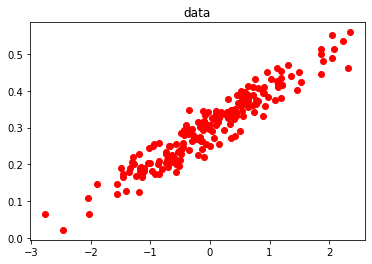

In [4]:
num_points = 200
x = []
y = []

for i in range(num_points):
    temp_x = np.random.normal(0.0, 1)
    # noise
    temp_y = 0.1 * temp_x + 0.3 + np.random.normal(0.0, 0.03)
    x.append(temp_x)
    y.append(temp_y)

x = np.array(x)
y = np.array(y)
plt.plot(x, y, 'ro')
plt.title('data')
plt.show()

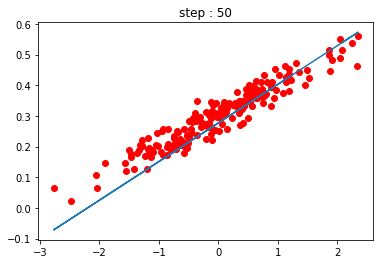

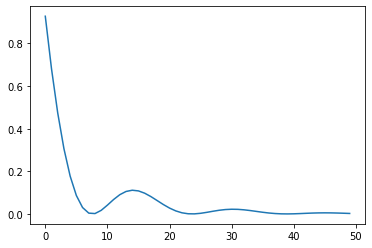

In [5]:
model = linear_model()
y_ = torch.tensor(y.reshape(-1, 1), dtype=torch.float32)
x_ = torch.tensor(x.reshape(-1, 1), dtype=torch.float32)
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
mse_loss = nn.MSELoss()

loss_list = []
for step in range(50):
  temp_y = model(x_)
  loss = mse_loss(temp_y, y_)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  loss_list.append(loss)


  param = []
  for parameter in model.parameters():
    param.append(parameter.item())

plt.plot(x, y, 'ro')
plt.plot(x, param[0] * x + param[1])
plt.title('step : ' + str(step + 1))
plt.show()

plt.plot(loss_list)